<a href="https://colab.research.google.com/github/apoorva666/MNIST-Modified-National-Institute-of-Standards-and-Technology-Image-Classification-model/blob/main/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing packages**

In [ ]:
import numpy as np
import tensorflow as tf                          

import tensorflow_datasets as tfds

In [ ]:
mnist_dataset, mnist_info = tfds.load(name='mnist', with_info=True, as_supervised=True)  #Loading dataset
#as_supervised=True: Data will be loaded as a 2 tuple structure (input,target)
#with_info=True: info of version, features, number of samples 

local data directory. If you'd instead prefer to read directly from our public
GCS bucket (recommended if you're running on GCP), you can instead pass
`try_gcs=True` to `tfds.load` or set `data_dir=gs://tfds-data/datasets`.





Dataset mnist downloaded and prepared to /root/tensorflow_datasets/mnist/3.0.1. Subsequent calls will reuse this data.


***Preprocessing data, Creating validation set, & scaling it***

In [ ]:
mnist_train, mnist_test=mnist_dataset['train'], mnist_dataset['test']

validation_samples=0.1*mnist_info.splits['train'].num_examples       #Taking 10% of train data for validation
validation_samples=tf.cast(validation_samples, tf.int64) #Converting the output of 10% into integer

test_samples= mnist_info.splits['test'].num_examples
test_samples=tf.cast(test_samples, tf.int64) 

In [ ]:
def scale(image, label):                     #Label (Target) 
  image=tf.cast(image,tf.float32)            #Numbers range from 0-255 (256 shades of grey)
  image=image/255.0                          #Scaling
  return image, label

scaled_trained_and_validation_data=mnist_train.map(scale) #Mapping original training & val data with scaled data

In [ ]:
test_data=mnist_test.map(scale) #Mapping original test data with scaled test data

In [ ]:
 Buffer_size=10000               #Shuffling data 10,000 at a time to optimize computational power

 shuffle_train_validation_data = scaled_trained_and_validation_data.shuffle(Buffer_size)

validation_data=shuffle_train_validation_data.take(validation_samples)
train_data=shuffle_train_validation_data.skip(validation_samples)

***Optimizing***

In [ ]:
 Batch_size=1000                                 #Stochastic GD

 train_data=train_data.batch(Batch_size)         #Train data will be divided into batches with 100 elements each   

 validation_data=validation_data.batch(validation_samples)
 
test_data=test_data.batch(test_samples)
                                           

In [ ]:
validation_inputs, validation_targets= next(iter(validation_data)) 
#Putting val data in 2 tuple form (like the train data)
#next() function manually iterates through all the items of an iterator.


***Outlining the model***

In [ ]:
input_size=784
output_size=10
hidden_layer_size=500

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28, 1)),            #Flattening the image into a column vector

    tf.keras.layers.Dense(hidden_layer_size, activation='relu'), # 1st hidden layer
    tf.keras.layers.Dense(hidden_layer_size, activation='relu'), # 2nd hidden layer
    tf.keras.layers.Dense(hidden_layer_size, activation='relu'), # 2nd hidden layer


    tf.keras.layers.Dense(output_size, activation='softmax') # output layer
])

**Optimizer & loss function**

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

***Training***

In [ ]:
no_of_epochs=5

model.fit(train_data, epochs=no_of_epochs, validation_data=(validation_inputs, validation_targets), verbose =2)

model.save('final_model.h5')

Epoch 1/5
54/54 - 12s - loss: 0.4787 - accuracy: 0.8685 - val_loss: 0.1771 - val_accuracy: 0.9458
Epoch 2/5
54/54 - 7s - loss: 0.1473 - accuracy: 0.9563 - val_loss: 0.1143 - val_accuracy: 0.9642
Epoch 3/5
54/54 - 7s - loss: 0.0935 - accuracy: 0.9724 - val_loss: 0.0831 - val_accuracy: 0.9758
Epoch 4/5
54/54 - 7s - loss: 0.0662 - accuracy: 0.9806 - val_loss: 0.0598 - val_accuracy: 0.9807
Epoch 5/5
54/54 - 7s - loss: 0.0475 - accuracy: 0.9861 - val_loss: 0.0447 - val_accuracy: 0.9863


* 540= total no. of weight & bias updates,
* Training loss has gradually decreased,
* Accuracy= % of cases in which o/p=targets, Loss=pred-observed values
* Validation accuracy= true accuracy of the model, 
* As we keep increasing the hidden layer size, the accuracy increases, & at some point starts overfitting,
* As no. of hidden layers increases accuracy increases



**Testing the model**

In [ ]:
test_loss, test_accuracy = model.evaluate(test_data)

1/1 [==============================] - 1s 1s/step - loss: 0.0733 - accuracy: 0.9771


In [ ]:
print('Test loss: {0:.2f}. Test accuracy: {1:.2f}%'.format(test_loss, test_accuracy*100.))

Test loss: 0.07. Test accuracy: 97.71%


**Testing with an image**

In [ ]:
from google.colab import files
from io import BytesIO         
from PIL import Image      #Python imaging library

uploaded = files.upload()
im = Image.open(BytesIO(uploaded['fiveMNIST.png']))

Saving fiveMNIST.png to fiveMNIST (1).png


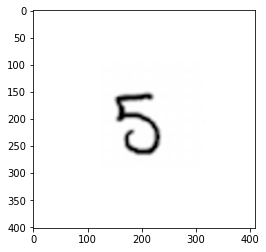

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(im)
plt.show()

In [ ]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import load_model
 
# load and prepare the image
def load_image(filename):
	# load the image
	img = load_img(filename, grayscale=True, target_size=(28, 28))
	# convert to array
	img = img_to_array(img)
	# reshape into a single sample with 1 channel
	img = img.reshape(1, 28, 28, 1)
	# prepare pixel data
	img = img.astype('float32')
	img = img / 255.0
	return img
 
# load an image and predict the class
def run_example():
	# load the image
	img = load_image('fiveMNIST.png')
	# load model
	model = load_model('final_model.h5')
	# predict the class
	digit = model.predict_classes(img)
	print(digit[0])
 
# entry point, run the example
run_example()

/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


5
